In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv("/Users/zahiramohammed/Desktop/DAPM_clean.csv")


In [3]:
data.head()

,Gender,Age,Hyper_Tension,Heart_Disease,Smoking_History,BMI,Blood_Glucose_Level,HbA1c_levels,Diabetes
0,1,1,0,0,0,-0.686567,0,2,0
1,1,2,0,0,1,-0.847830,1,0,0
2,1,2,0,0,0,-0.780009,2,0,0
3,1,2,1,0,0,0.146876,2,1,1
4,1,0,0,0,0,-1.435611,2,0,0


In [4]:
X = data[['Age','Heart_Disease', 'Blood_Glucose_Level']]


Cluster Statistics:
    Cluster    Gender       Age  Hyper_Tension  Heart_Disease  \
0        -1  0.090909  1.818182       0.181818            1.0   
1         0  0.516129  1.000000       0.000000            0.0   
2         1  0.642857  2.000000       0.000000            0.0   
3         2  0.600000  2.000000       0.118519            0.0   
4         3  0.571429  0.000000       0.000000            0.0   
5         4  0.675926  1.000000       0.018519            0.0   
6         5  0.677419  3.000000       0.177419            0.0   
7         6  0.578947  2.000000       0.026316            0.0   
8         7  0.733333  3.000000       0.133333            0.0   
9         8  0.500000  1.000000       0.000000            0.0   
10        9  0.625000  3.000000       0.000000            1.0   
11       10  0.400000  0.000000       0.000000            0.0   
12       11  0.333333  3.000000       0.333333            0.0   
13       12  0.285714  0.000000       0.000000            0.0   

    

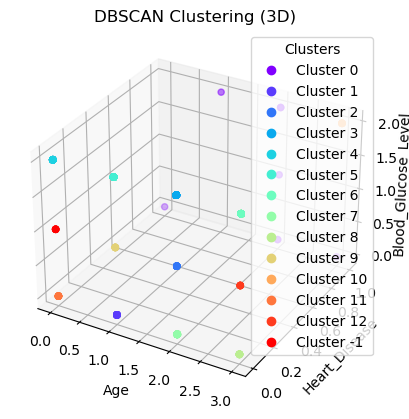

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

eps = 0.485 # Maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 6 # Minimum number of samples in a neighborhood to consider a core point

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(X_scaled)

data['Cluster'] = cluster_labels
cluster_stats = data.groupby('Cluster').mean().reset_index()
print("Cluster Statistics:")
print(cluster_stats)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X['Age'], X['Heart_Disease'], X['Blood_Glucose_Level'], c=cluster_labels, cmap='rainbow')
ax.set_xlabel('Age')
ax.set_ylabel('Heart_Disease')
ax.set_zlabel('Blood_Glucose_Level',labelpad=-2, y=1.0, rotation=1)
ax.set_title('DBSCAN Clustering (3D)')

# Get unique cluster labels and create legend labels
unique_labels = set(cluster_labels)
legend_labels = [f'Cluster {x}' for x in unique_labels] 

ax.legend(handles=scatter.legend_elements()[0], 
          labels=legend_labels, 
          title="Clusters",loc="best")

plt.show()

In [13]:
from sklearn.metrics import silhouette_score

In [14]:
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.980158468184228


In [29]:
# Get unique cluster labels and create legend labels
unique_labels = set(cluster_labels)
legend_labels = [f'Cluster {x}' for x in unique_labels]
# Create legend
